In [119]:
# these were discussed in lecture
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'  
import sys
print(sys.version)

3.9.7 (default, Sep 16 2021, 08:50:36) 
[Clang 10.0.0 ]


In [120]:
x = np.arange(17,21.5,0.5)
x_expand = np.arange(17,22.5,0.5)

y = np.arange(9,12.5,0.5)
X, Y = np.meshgrid(x,y)          
X_expand, Y_expand = np.meshgrid(x_expand,y)

In [121]:
(X_expand,Y)

(array([[17. , 17.5, 18. , 18.5, 19. , 19.5, 20. , 20.5, 21. , 21.5, 22. ],
        [17. , 17.5, 18. , 18.5, 19. , 19.5, 20. , 20.5, 21. , 21.5, 22. ],
        [17. , 17.5, 18. , 18.5, 19. , 19.5, 20. , 20.5, 21. , 21.5, 22. ],
        [17. , 17.5, 18. , 18.5, 19. , 19.5, 20. , 20.5, 21. , 21.5, 22. ],
        [17. , 17.5, 18. , 18.5, 19. , 19.5, 20. , 20.5, 21. , 21.5, 22. ],
        [17. , 17.5, 18. , 18.5, 19. , 19.5, 20. , 20.5, 21. , 21.5, 22. ],
        [17. , 17.5, 18. , 18.5, 19. , 19.5, 20. , 20.5, 21. , 21.5, 22. ]]),
 array([[ 9. ,  9. ,  9. ,  9. ,  9. ,  9. ,  9. ,  9. ,  9. ],
        [ 9.5,  9.5,  9.5,  9.5,  9.5,  9.5,  9.5,  9.5,  9.5],
        [10. , 10. , 10. , 10. , 10. , 10. , 10. , 10. , 10. ],
        [10.5, 10.5, 10.5, 10.5, 10.5, 10.5, 10.5, 10.5, 10.5],
        [11. , 11. , 11. , 11. , 11. , 11. , 11. , 11. , 11. ],
        [11.5, 11.5, 11.5, 11.5, 11.5, 11.5, 11.5, 11.5, 11.5],
        [12. , 12. , 12. , 12. , 12. , 12. , 12. , 12. , 12. ]]))

In [122]:
c = 2.99792458e10 
U = X - Y - np.log10(c)
U_expand = X_expand - Y_expand - np.log10(c)

In [179]:
import pandas as pd        

df_he = pd.read_csv('/Users/huangjiamu/Desktop/LOC_grid_N23_3Z_helium.txt', sep='	', comment='#', header=None)
iternbr = df_he[0].values
HeI5876 = df_he[3].values

df_carb = pd.read_csv('/Users/huangjiamu/Desktop/LOC_grid_N23_3Z_carbon_mg.txt', sep='	', comment='#', header=None)
C4 = df_carb[2].values
C3 = df_carb[3].values

In [180]:
it = np.zeros(len(iternbr))
for i in range(len(iternbr)):
    it[i] = float(iternbr[i].split(' ')[1])

In [183]:
len(it)

234

In [184]:
ix = np.linspace(0,234,234)
plt.plot(ix, it)

In [185]:
from scipy.signal import argrelextrema

# for local maxima
argmax = np.append(argrelextrema(it, np.greater), 230)

HeI5876_sel = HeI5876[argmax]
C4_sel = C4[argmax]
C3_sel = C3[argmax]

HeI5876_plot = HeI5876_sel.reshape(9,7)
C4_plot = C4_sel.reshape(9,7)
C3_plot = C3_sel.reshape(9,7)
#HeI5876_plot = HeI5876_plot[0:9,0:7]
HeI5876_plot

array([[1.8364e-01, 1.9378e-01, 2.1449e-01, 2.5440e-01, 3.0766e-01,
        3.4638e-01, 3.5339e-01],
       [1.7377e-01, 1.8214e-01, 1.9533e-01, 2.2988e-01, 2.8859e-01,
        3.4783e-01, 3.7283e-01],
       [1.4111e-01, 1.6405e-01, 1.7616e-01, 1.9314e-01, 2.2405e-01,
        2.6728e-01, 3.0230e-01],
       [6.1145e-02, 9.6551e-02, 1.4450e-01, 1.8723e-01, 2.1270e-01,
        2.1085e-01, 2.0584e-01],
       [8.7280e-02, 6.6805e-02, 1.0125e-01, 1.4441e-01, 1.7158e-01,
        1.8581e-01, 2.0709e-01],
       [1.6562e-01, 9.0268e-02, 9.2066e-02, 1.3555e-01, 1.8411e-01,
        2.2937e-01, 2.6848e-01],
       [6.4322e-02, 1.5488e-01, 1.3142e-01, 1.4925e-01, 2.0483e-01,
        2.7274e-01, 3.0375e-01],
       [7.5037e-06, 9.0357e-02, 1.6352e-01, 2.2292e-01, 2.2402e-01,
        2.6898e-01, 2.9737e-01],
       [2.6129e-06, 1.0280e-05, 1.1192e-01, 1.5745e-01, 2.7398e-01,
        2.8300e-01, 2.2165e-01]])

In [186]:
HeI5875

array([[0.17856 , 0.1672  , 0.12074 , 0.052892, 0.039671, 0.038817,
        0.069176, 0.13535 , 0.082715],
       [0.18847 , 0.17303 , 0.15751 , 0.085637, 0.064156, 0.0608  ,
        0.066841, 0.10984 , 0.13895 ],
       [0.21035 , 0.18884 , 0.17402 , 0.13497 , 0.097445, 0.091867,
        0.10038 , 0.12464 , 0.18356 ],
       [0.25157 , 0.22762 , 0.19074 , 0.18154 , 0.13862 , 0.13221 ,
        0.14286 , 0.16778 , 0.20114 ],
       [0.30562 , 0.29254 , 0.22454 , 0.21399 , 0.17068 , 0.17491 ,
        0.19173 , 0.21133 , 0.24382 ],
       [0.34551 , 0.35694 , 0.27639 , 0.22108 , 0.18901 , 0.22048 ,
        0.2406  , 0.23078 , 0.24078 ],
       [0.35143 , 0.38408 , 0.32352 , 0.22003 , 0.20986 , 0.26216 ,
        0.28296 , 0.26102 , 0.25112 ]])

In [187]:
matplotlib.rcParams['text.usetex'] = True
plt.rc('axes', linewidth=2)
font = {'family' : 'serif',
        'size'   : 25,}
plt.rc('font', **font)
fig = plt.figure(figsize=(8,8)) 
from pylab import *
rc('axes', linewidth=2)
#levels_he1 = [0.05, 0.10, 0.15, 0.20, 0.25, 0.30, 0.35]
contours = plt.contour(X, Y, HeI5876_plot.T, linewidths=3, levels = levels_he1)
us = plt.contour(X, Y, U, colors='k', alpha=0.5, linestyles=':')
plt.clabel(contours, inline=True)
plt.clabel(us, inline=True, fontsize=20)
plt.xticks(np.arange(min(x)+0.5, max(x)+0.5, 0.5))
plt.yticks(np.arange(min(y), max(y)+0.5, 0.5))
#plt.title(r'I(7065)/I(5876), N=24, $v_{turb}=500$km/s, $Z=4Z_{\odot}$, [He/H]=0.1', fontsize=15)
plt.ylabel(r'$\log n_H$ $[\rm cm^{-3}]$')
plt.xlabel(r'$\log \phi$ $[\rm photons\,cm^{-2}\,s^{-1}]$')
plt.tick_params(axis='both', which='major',length=9,width=2,direction='in')
plt.savefig('HeI_over_hb_paperplot_N23.png', dpi=300, facecolor='white', edgecolor='white', bbox_inches='tight');

In [ ]:
matplotlib.rcParams['text.usetex'] = True
plt.rc('axes', linewidth=2)
font = {'family' : 'serif',
        'size'   : 25,}
plt.rc('font', **font)
fig = plt.figure(figsize=(8,8)) 
from pylab import *
rc('axes', linewidth=2)
contours = plt.contour(X, Y, HeI5875, linewidths=3)
us = plt.contour(X, Y, U, colors='k', alpha=0.5, linestyles=':')
#contours_n23 = plt.contour(X, Y, HeI5876_plot.T, linewidths=3, levels = levels_he1, linestyles='--')
plt.clabel(contours, inline=True, fontsize=20)
plt.clabel(us, inline=True, fontsize=15)
plt.xticks(np.arange(min(x)+0.5, max(x)+0.5, 0.5), fontsize=20)
plt.yticks(np.arange(min(y), max(y)+0.5, 0.5), fontsize=16)
#plt.title(r'I(7065)/I(5876), N=24, $v_{turb}=500$km/s, $Z=4Z_{\odot}$, [He/H]=0.1', fontsize=15)
plt.ylabel(r'log $n_H$ $[\rm cm^{-3}]$', fontsize=20)
plt.xlabel(r'log $\phi$ $[\rm photons\,cm^{-2}\,s^{-1}]$', fontsize=20)
plt.tick_params(axis='both', which='major',length=9,width=2,direction='in')
plt.savefig('5876_over_hb.png', dpi=300, facecolor='white', edgecolor='white');

In [165]:
level = np.arange(-2,4,0.5)
level = np.append(level, (-0.2))
level = np.sort(level)

/var/folders/br/6sw3kv492t7c0z79vwnhb9gr0000gn/T/ipykernel_59760/3691893432.py:10: RuntimeWarning: divide by zero encountered in true_divide
  contours = plt.contour(X, Y, np.log10(C3_plot.T / C4_plot.T), levels=level, linewidths=3)


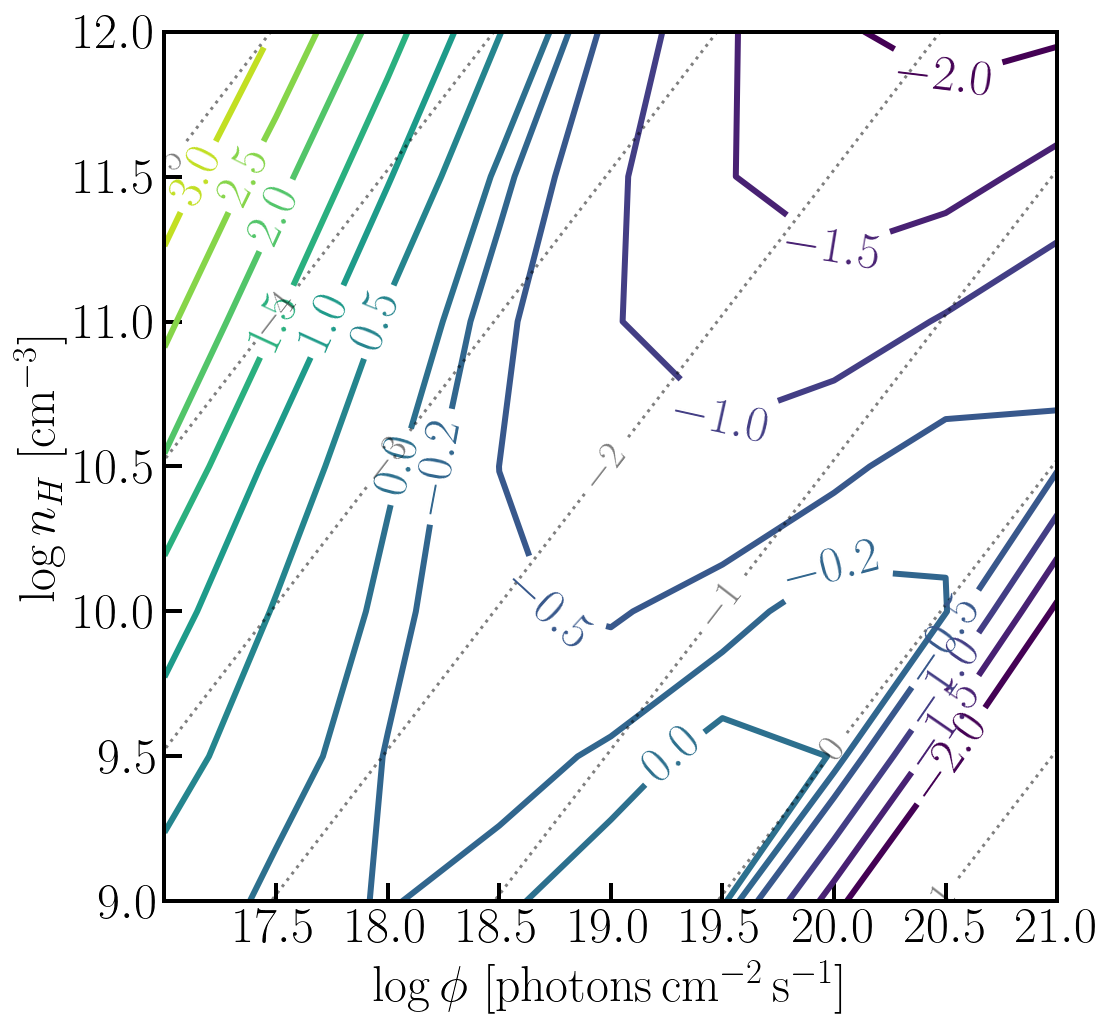

In [178]:
matplotlib.rcParams['text.usetex'] = True
plt.rc('axes', linewidth=2)
font = {'family' : 'serif',
        'size'   : 25,}
plt.rc('font', **font)
fig = plt.figure(figsize=(8,8)) 
from pylab import *
rc('axes', linewidth=2)
#levels_he1 = [0.05, 0.10, 0.15, 0.20, 0.25, 0.30, 0.35]
contours = plt.contour(X, Y, np.log10(C3_plot.T / C4_plot.T), levels=level, linewidths=3)
us = plt.contour(X, Y, U, colors='k', alpha=0.5, linestyles=':')
plt.clabel(contours, inline=True)
plt.clabel(us, inline=True, fontsize=20)
plt.xticks(np.arange(min(x)+0.5, max(x)+0.5, 0.5))
plt.yticks(np.arange(min(y), max(y)+0.5, 0.5))
#plt.title(r'I(7065)/I(5876), N=24, $v_{turb}=500$km/s, $Z=4Z_{\odot}$, [He/H]=0.1', fontsize=15)
plt.ylabel(r'$\log n_H$ $[\rm cm^{-3}]$')
plt.xlabel(r'$\log \phi$ $[\rm photons\,cm^{-2}\,s^{-1}]$')
plt.tick_params(axis='both', which='major',length=9,width=2,direction='in')
plt.savefig('c3_over_c4_paperplot_N23', dpi=300, facecolor='white', edgecolor='white', bbox_inches='tight');

In [4]:
len(Y)

7

In [18]:
HeI5876_plot.T

array([[1.4746e-01, 1.5302e-01, 1.2549e-01, 5.0055e-02, 8.6328e-02,
        1.6745e-01, 6.3689e-02, 7.7354e-06, 2.6734e-06, 4.7066e-06,
        1.1859e-06],
       [1.4892e-01, 1.5882e-01, 1.6028e-01, 8.9720e-02, 6.3861e-02,
        9.6206e-02, 1.5342e-01, 8.7772e-02, 1.0630e-05, 4.0582e-06,
        5.0721e-06],
       [1.5818e-01, 1.6493e-01, 1.7664e-01, 1.3544e-01, 9.5420e-02,
        8.7238e-02, 1.1855e-01, 1.5966e-01, 1.0733e-01, 1.6646e-05,
        6.9780e-06],
       [1.8089e-01, 1.7994e-01, 1.9045e-01, 1.7005e-01, 1.2779e-01,
        1.1271e-01, 1.1999e-01, 1.8166e-01, 1.9639e-01, 1.4749e-01,
        2.9227e-05],
       [2.1406e-01, 2.0856e-01, 2.0875e-01, 1.9509e-01, 1.4165e-01,
        1.3733e-01, 1.5098e-01, 1.7170e-01, 2.4005e-01, 2.5044e-01,
        1.9219e-01],
       [2.4177e-01, 2.3906e-01, 2.2575e-01, 1.9807e-01, 1.4390e-01,
        1.6192e-01, 1.8644e-01, 1.9269e-01, 2.1442e-01, 2.8368e-01,
        3.2124e-01],
       [2.5618e-01, 2.5237e-01, 2.3056e-01, 1.8495e-01, 1.

In [15]:
HeI5875 = np.array([[1.7856e-01, 1.6720e-01, 1.2074e-01, 5.2892e-02, 3.9671e-02, 3.8817e-02, 6.9176e-02, 1.3535e-01, 8.2715e-02],
                    [1.8847e-01, 1.7303e-01, 1.5751e-01, 8.5637e-02, 6.4156e-02, 6.0800e-02, 6.6841e-02, 1.0984e-01, 1.3895e-01],
                    [2.1035e-01, 1.8884e-01, 1.7402e-01, 1.3497e-01, 9.7445e-02, 9.1867e-02, 1.0038e-01, 1.2464e-01, 1.8356e-01],         
                    [2.5157e-01, 2.2762e-01, 1.9074e-01, 1.8154e-01, 1.3862e-01, 1.3221e-01, 1.4286e-01, 1.6778e-01, 2.0114e-01],
                    [3.0562e-01, 2.9254e-01, 2.2454e-01, 2.1399e-01, 1.7068e-01, 1.7491e-01, 1.9173e-01, 2.1133e-01, 2.4382e-01],
                    [3.4551e-01, 3.5694e-01, 2.7639e-01, 2.2108e-01, 1.8901e-01, 2.2048e-01, 2.4060e-01, 2.3078e-01, 2.4078e-01],
                    [3.5143e-01, 3.8408e-01, 3.2352e-01, 2.2003e-01, 2.0986e-01, 2.6216e-01, 2.8296e-01, 2.6102e-01, 2.5112e-01]])

In [6]:
HeI7065 = np.array([[9.7645e-02, 1.0437e-01, 8.4072e-02, 3.7940e-02, 2.9047e-02, 3.1029e-02, 6.0456e-02, 1.1169e-01, 3.7574e-02],
                    [9.3433e-02, 9.3255e-02, 9.3167e-02, 5.4202e-02, 4.1957e-02, 4.3370e-02, 5.5245e-02, 9.2219e-02, 9.9413e-02],
                    [9.2791e-02, 8.8535e-02, 8.5340e-02, 6.8756e-02, 5.0665e-02, 5.2080e-02, 7.4859e-02, 1.0132e-01, 1.1519e-01],         
                    [9.2554e-02, 8.8379e-02, 7.5585e-02, 7.1929e-02, 5.3508e-02, 5.5682e-02, 9.2846e-02, 1.2913e-01, 1.2057e-01],
                    [9.1444e-02, 8.8277e-02, 6.8535e-02, 6.5062e-02, 5.0053e-02, 5.6277e-02, 1.0777e-01, 1.5124e-01, 1.5474e-01],
                    [8.4374e-02, 8.5499e-02, 6.5125e-02, 5.2265e-02, 4.3971e-02, 5.6969e-02, 1.1153e-01, 1.6084e-01, 1.7708e-01],
                    [7.0775e-02, 7.6461e-02, 6.3135e-02, 4.2163e-02, 4.0589e-02, 5.8136e-02, 1.0316e-01, 1.5423e-01, 1.8004e-01]])


In [7]:
HeI5875_v500 = np.array([[1.3561e-01, 1.4003e-01, 1.3565e-01, 1.1060e-01, 4.4102e-02, 3.0797e-02, 6.2581e-02, 1.7910e-01, 9.6543e-02],
                        [1.4535e-01, 1.5223e-01, 1.5085e-01, 1.3031e-01, 6.7853e-02, 3.8091e-02, 4.1456e-02, 8.0789e-02, 1.9441e-01],
                        [1.6023e-01, 1.6845e-01, 1.6866e-01, 1.4866e-01, 1.0279e-01, 6.1323e-02, 5.8871e-02, 7.1191e-02, 1.2311e-01],         
                        [1.8735e-01, 1.9652e-01, 1.9737e-01, 1.7346e-01, 1.4812e-01, 9.4044e-02, 8.5948e-02, 9.8802e-02, 1.2286e-01],
                        [2.2607e-01, 2.4583e-01, 2.4281e-01, 2.1219e-01, 1.8432e-01, 1.3719e-01, 1.1577e-01, 1.2335e-01, 1.4737e-01],
                        [2.5745e-01, 2.9899e-01, 3.0333e-01, 2.6200e-01, 2.1212e-01, 1.7140e-01, 1.4013e-01, 1.4407e-01, 1.5913e-01],
                        [2.7256e-01, 3.1826e-01, 3.4625e-01, 3.1140e-01, 2.3185e-01, 1.8787e-01, 1.6002e-01, 1.7106e-01, 1.7164e-01]])


In [8]:
HeI7065_v500 = np.array([[6.4005e-02, 7.1043e-02, 7.4761e-02, 6.5164e-02, 2.6829e-02, 1.8694e-02, 3.5586e-02, 8.7465e-02, 3.4259e-02],
                        [6.5035e-02, 7.2391e-02, 7.6580e-02, 6.9130e-02, 3.6507e-02, 1.9943e-02, 2.0836e-02, 4.1430e-02, 8.8695e-02],
                        [6.5488e-02, 7.3409e-02, 7.7460e-02, 7.0102e-02, 4.7956e-02, 2.6723e-02, 2.3708e-02, 3.0865e-02, 6.0460e-02],         
                        [6.5675e-02, 7.3760e-02, 7.7314e-02, 6.9272e-02, 5.8482e-02, 3.4098e-02, 2.7704e-02, 3.4927e-02, 5.6291e-02],
                        [6.6217e-02, 7.4435e-02, 7.6070e-02, 6.7750e-02, 5.9026e-02, 4.2123e-02, 3.2407e-02, 3.9161e-02, 6.7984e-02],
                        [6.2776e-02, 7.3911e-02, 7.5727e-02, 6.6887e-02, 5.5366e-02, 4.4886e-02, 3.5814e-02, 4.4380e-02, 7.4197e-02],
                        [5.5660e-02, 6.6561e-02, 7.3507e-02, 6.6693e-02, 5.1208e-02, 4.2710e-02, 3.7327e-02, 4.9519e-02, 7.9344e-02]])


In [9]:
HeI5875_2He = np.array([[3.7489e-01, 3.5560e-01, 2.5971e-01, 1.0863e-01, 7.7783e-02, 7.4548e-02, 1.2831e-01, 2.5596e-01, 1.8920e-01],
                        [3.8876e-01, 3.6486e-01, 3.3749e-01, 1.8182e-01, 1.2906e-01, 1.1355e-01, 1.1675e-01, 1.9084e-01, 2.5964e-01],
                        [4.1899e-01, 3.9221e-01, 3.7099e-01, 2.9179e-01, 2.0220e-01, 1.6868e-01, 1.6100e-01, 1.8401e-01, 2.5050e-01],         
                       [4.7532e-01, 4.5734e-01, 4.0012e-01, 3.9530e-01, 2.9637e-01, 2.2836e-01, 2.1289e-01, 2.2434e-01, 2.4752e-01],
                       [5.4480e-01, 5.5672e-01, 4.5718e-01, 4.5965e-01, 3.6749e-01, 2.9070e-01, 2.4125e-01, 2.3679e-01, 2.5324e-01],
                       [5.7912e-01, 6.3056e-01, 5.2982e-01, 4.6208e-01, 3.9126e-01, 3.3882e-01, 2.9135e-01, 2.5736e-01, 2.6090e-01],
                       [5.6086e-01, 6.3311e-01, 5.6698e-01, 4.2177e-01, 3.8118e-01, 3.6915e-01, 3.3364e-01, 2.8661e-01, 2.8044e-01]])



In [10]:
HeI5875_4He = np.array([[7.0626e-01, 6.9041e-01, 5.2970e-01, 2.1584e-01, 1.4813e-01, 1.3389e-01, 2.2893e-01, 4.1113e-01, 4.1180e-01],
                        [7.1153e-01, 6.9006e-01, 6.5932e-01, 3.5900e-01, 2.4416e-01, 1.9975e-01, 1.9399e-01, 2.8819e-01, 3.9770e-01],
                        [7.4401e-01, 7.1773e-01, 7.0466e-01, 5.6362e-01, 3.6908e-01, 2.7454e-01, 2.4312e-01, 2.4952e-01, 3.1252e-01],         
                       [8.0473e-01, 8.1340e-01, 7.3258e-01, 7.5009e-01, 5.3129e-01, 3.3985e-01, 2.6845e-01, 2.5550e-01, 2.7680e-01],
                       [8.5884e-01, 9.3592e-01, 8.0327e-01, 8.3061e-01, 6.5131e-01, 4.0748e-01, 2.9217e-01, 2.6872e-01, 2.7879e-01],
                       [8.5445e-01, 9.7393e-01, 8.8290e-01, 8.0648e-01, 6.6300e-01, 4.5601e-01, 3.3066e-01, 2.7928e-01, 2.9332e-01],
                       [7.8609e-01, 9.1347e-01, 8.6691e-01, 6.9874e-01, 5.9861e-01, 4.8793e-01, 3.8255e-01, 3.1405e-01, 3.0045e-01]])



In [11]:
c = 2.99792458e10 
U = X - Y - np.log10(c)
U_expand = X_expand - Y_expand - np.log10(c)

Text(0.5, 0, 'log $\\phi$')

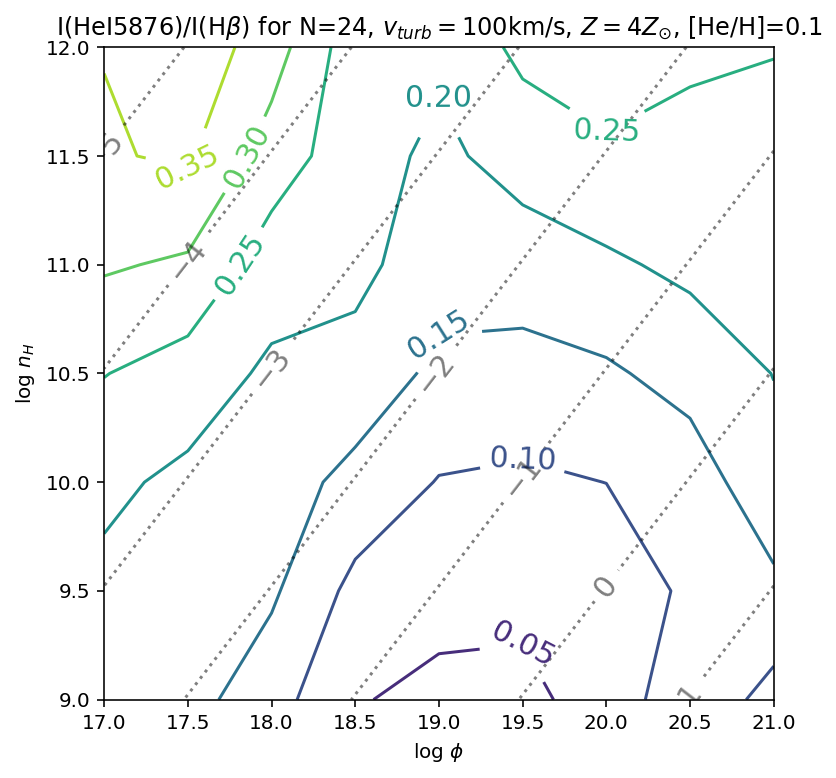

In [12]:
fig = plt.figure(figsize=(6,6)) 
contours = plt.contour(X, Y, HeI5875)
plt.clabel(contours, inline=True, fontsize=15)
us = plt.contour(X, Y, U, colors='k', alpha=0.5, linestyles=':')
plt.clabel(us, inline=True, fontsize=15)
plt.xticks(np.arange(min(x), max(x)+0.5, 0.5), fontsize=10)
plt.yticks(np.arange(min(y), max(y)+0.5, 0.5), fontsize=10)
plt.title(r'I(HeI5876)/I(H$\beta$) for N=24, $v_{turb}=100$km/s, $Z=4Z_{\odot}$, [He/H]=0.1', fontsize=12)
plt.ylabel('log $n_H$')
plt.xlabel('log $\phi$')
#plt.savefig('LOC_heliumI5876_heh_1.png', dpi=300, facecolor='white', edgecolor='white');

In [13]:
fig = plt.figure(figsize=(6,6)) 
contours = plt.contour(X, Y, HeI5875_2He)
plt.clabel(contours, inline=True, fontsize=15)
plt.xticks(np.arange(min(x), max(x)+0.5, 0.5), fontsize=10)
plt.yticks(np.arange(min(y), max(y)+0.5, 0.5), fontsize=10)
plt.title(r'I(HeI5876)/I(H$\beta$) for N=24, $v_{turb}=100$km/s, $Z=4Z_{\odot}$, [He/H]=0.2', fontsize=12)
plt.ylabel('log $n_H$')
plt.xlabel('log $\phi$')
#plt.savefig('LOC_heliumI5876_heh_2.png', dpi=300, facecolor='white', edgecolor='white');

Text(0.5, 0, 'log $\\phi$')

Text(0.5, 0, 'log $\\phi$')

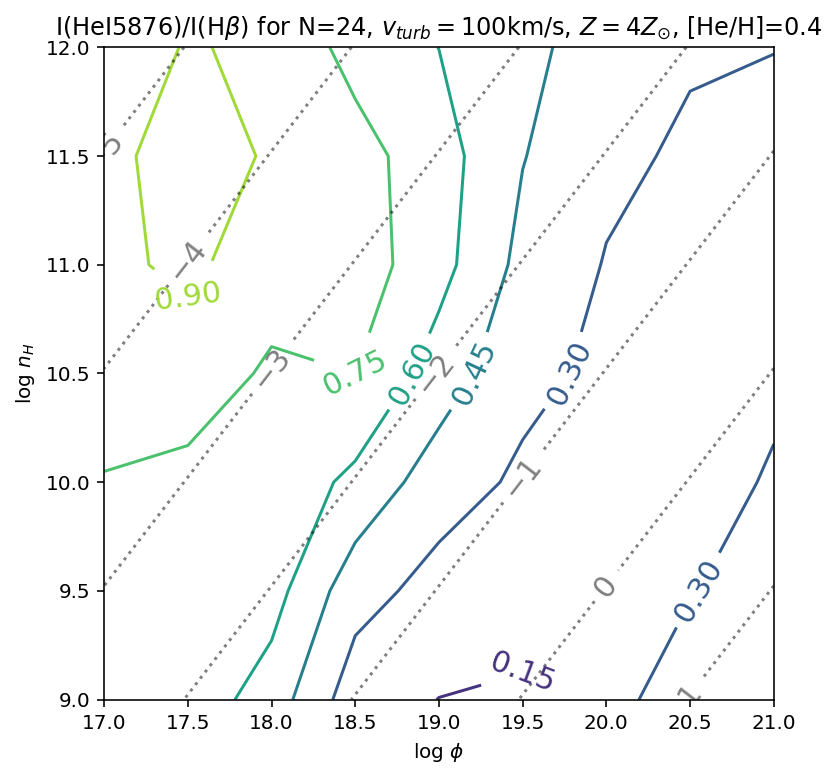

In [14]:
fig = plt.figure(figsize=(6,6)) 
contours = plt.contour(X, Y, HeI5875_4He)
plt.clabel(contours, inline=True, fontsize=15)
us = plt.contour(X, Y, U, colors='k', alpha=0.5, linestyles=':')
plt.clabel(us, inline=True, fontsize=15)
plt.xticks(np.arange(min(x), max(x)+0.5, 0.5), fontsize=10)
plt.yticks(np.arange(min(y), max(y)+0.5, 0.5), fontsize=10)
plt.title(r'I(HeI5876)/I(H$\beta$) for N=24, $v_{turb}=100$km/s, $Z=4Z_{\odot}$, [He/H]=0.4', fontsize=12)
plt.ylabel('log $n_H$')
plt.xlabel('log $\phi$')
#plt.savefig('LOC_heliumI5876_heh_4.png', dpi=300, facecolor='white', edgecolor='white');

Text(0.5, 0, 'log $\\phi$')

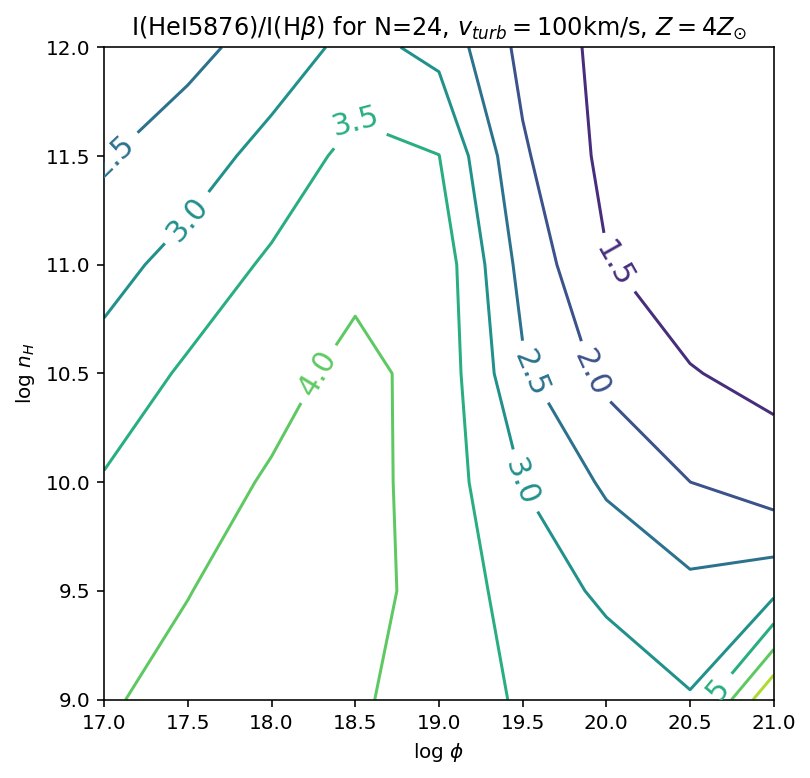

In [15]:
fig = plt.figure(figsize=(6,6)) 
contours = plt.contour(X, Y, HeI5875_4He/HeI5875)
plt.clabel(contours, inline=True, fontsize=15)
plt.xticks(np.arange(min(x), max(x)+0.5, 0.5), fontsize=10)
plt.yticks(np.arange(min(y), max(y)+0.5, 0.5), fontsize=10)
plt.title(r'I(HeI5876)/I(H$\beta$) for N=24, $v_{turb}=100$km/s, $Z=4Z_{\odot}$', fontsize=12)
plt.ylabel('log $n_H$')
plt.xlabel('log $\phi$')
#plt.savefig('LOC_heliumI5876', dpi=300, facecolor='white', edgecolor='white');

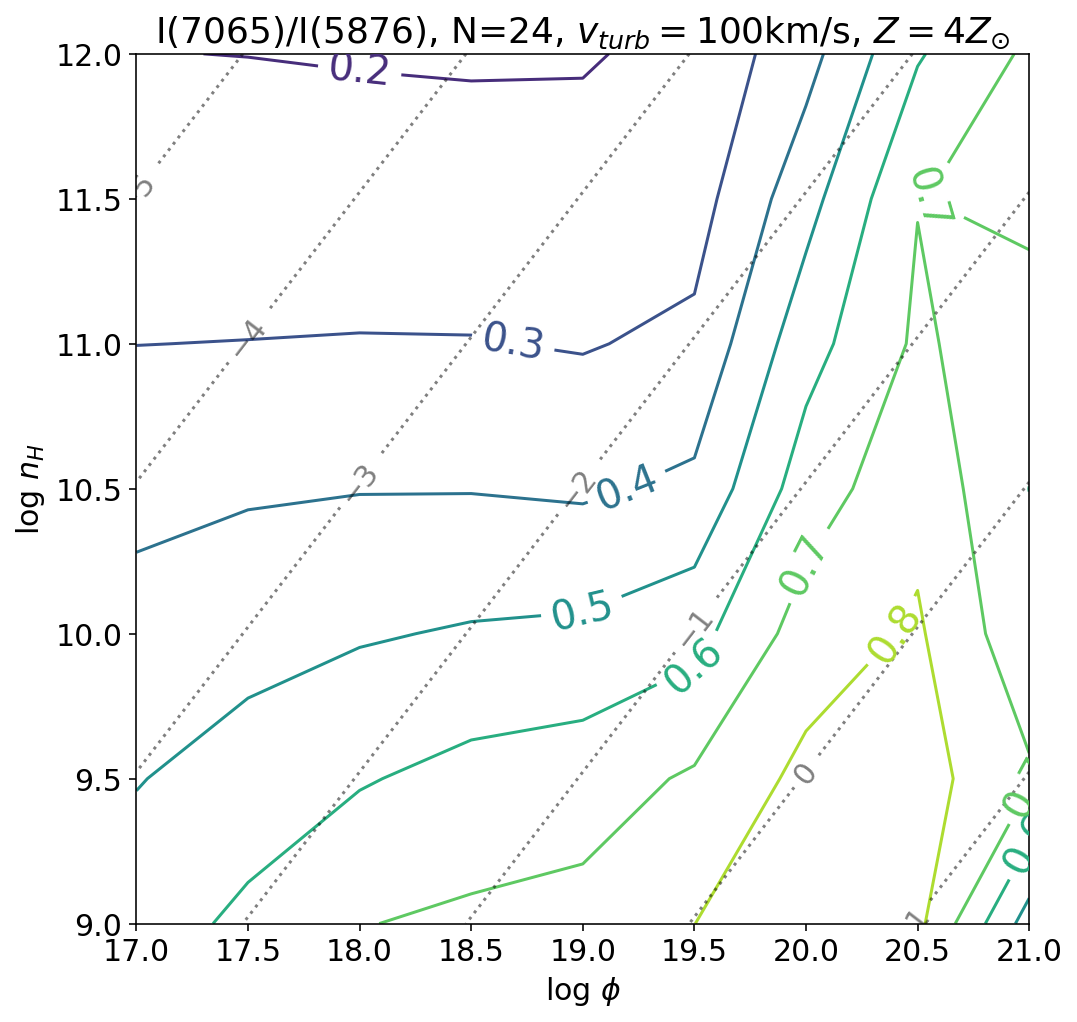

In [16]:
fig = plt.figure(figsize=(8,8)) 
contours = plt.contour(X, Y, HeI7065/HeI5875)
us = plt.contour(X, Y, U, colors='k', alpha=0.5, linestyles=':')
plt.clabel(contours, inline=True, fontsize=20)
plt.clabel(us, inline=True, fontsize=15)
plt.xticks(np.arange(min(x), max(x)+0.5, 0.5), fontsize=15)
plt.yticks(np.arange(min(y), max(y)+0.5, 0.5), fontsize=15)
plt.title(r'I(7065)/I(5876), N=24, $v_{turb}=100$km/s, $Z=4Z_{\odot}$', fontsize=18)
plt.ylabel('log $n_H$', fontsize=15)
plt.xlabel('log $\phi$', fontsize=15);
plt.savefig('7065_over_5876', dpi=300, facecolor='white', edgecolor='white');

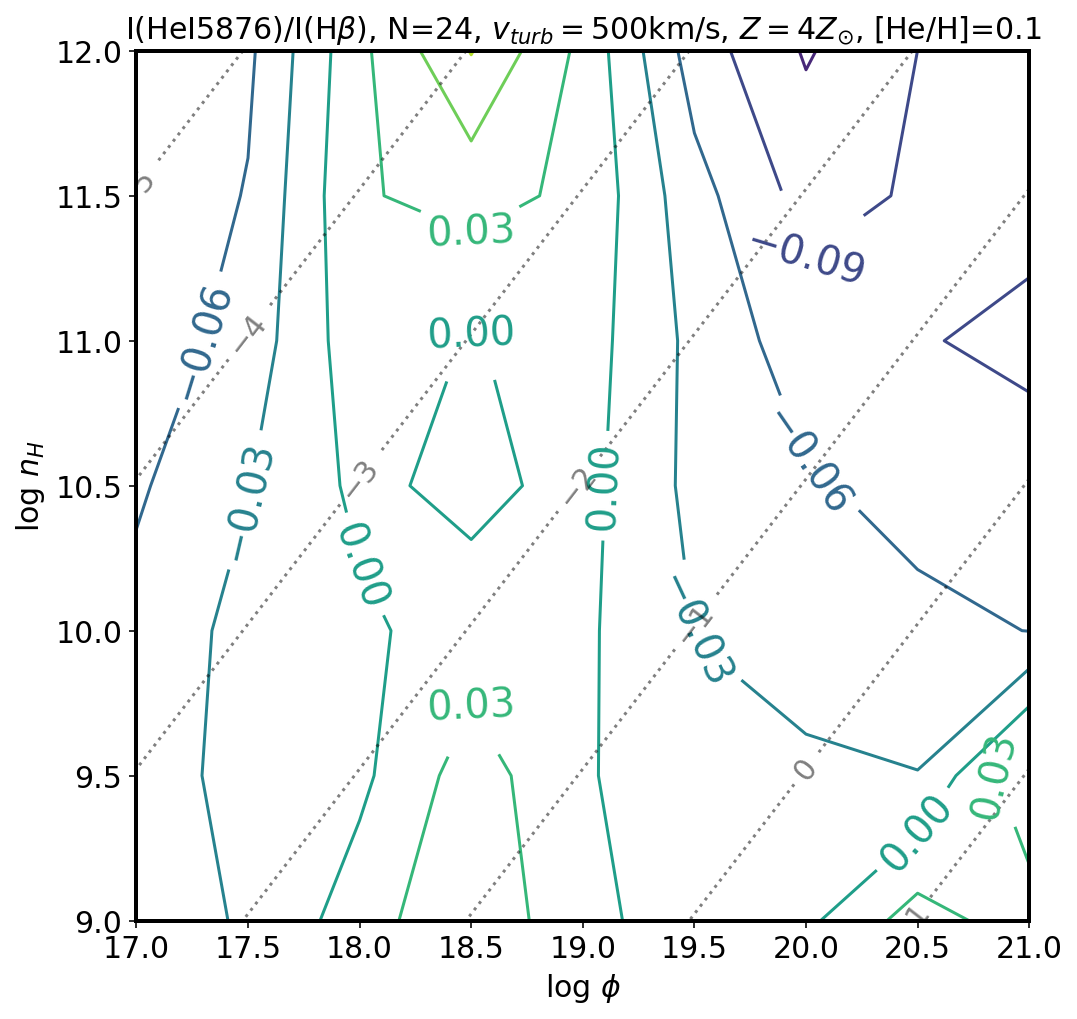

In [18]:
fig = plt.figure(figsize=(8,8)) 
contours = plt.contour(X, Y, HeI5875_v500-HeI5875)
us = plt.contour(X, Y, U, colors='k', alpha=0.5, linestyles=':')
plt.clabel(contours, inline=True, fontsize=20)
plt.clabel(us, inline=True, fontsize=15)
plt.xticks(np.arange(min(x), max(x)+0.5, 0.5), fontsize=15)
plt.yticks(np.arange(min(y), max(y)+0.5, 0.5), fontsize=15)
plt.title(r'I(HeI5876)/I(H$\beta$), N=24, $v_{turb}=500$km/s, $Z=4Z_{\odot}$, [He/H]=0.1', fontsize=15)
plt.ylabel('log $n_H$', fontsize=15)
plt.xlabel('log $\phi$', fontsize=15);
#plt.savefig('5876_over_hb.png', dpi=300, facecolor='white', edgecolor='white');

In [19]:
fig = plt.figure(figsize=(6,6)) 
plt.imshow(HeI5875_4He)

In [146]:
CIII = np.array([[9.2639e+00, 9.1579e+00, 6.6782e+00, 3.5934e+00, 3.3147e+00, 3.5364e+00, 6.1376e+00, 1.0912e+01, 2.5172e-01],
                 [4.9198e+00, 6.7478e+00, 6.2988e+00, 3.4582e+00, 3.2274e+00, 3.7718e+00, 4.3719e+00, 6.6290e+00, 7.6412e+00],
                 [1.1188e+00, 2.6711e+00, 3.5589e+00, 2.7855e+00, 2.0093e+00, 2.4248e+00, 3.4332e+00, 4.5975e+00, 6.2252e+00],         
                 [1.0417e-01, 4.2308e-01, 9.5155e-01, 1.3208e+00, 9.4920e-01, 9.2107e-01, 1.5127e+00, 2.7530e+00, 4.0512e+00],
                 [1.1606e-02, 3.1823e-02, 1.0289e-01, 2.8680e-01, 3.0901e-01, 2.8651e-01, 4.1146e-01, 9.5412e-01, 2.1151e+00],
                 [1.7479e-03, 3.4578e-03, 6.6329e-03, 2.1435e-02, 5.1189e-02, 7.5625e-02, 1.0962e-01, 2.1648e-01, 6.1576e-01],
                 [3.4937e-04, 5.5262e-04, 7.4503e-04, 9.7556e-04, 3.0924e-03, 1.1691e-02, 2.7812e-02, 5.4185e-02, 1.2559e-01]])


In [21]:
CIII_v500 = np.array([[7.2283e+00, 7.8992e+00, 7.8164e+00, 8.1254e+00, 4.0848e+00, 3.0174e+00, 5.6369e+00, 1.4154e+01, 2.8418e-01],
                 [3.9420e+00, 6.2149e+00, 6.4365e+00, 5.7699e+00, 3.8782e+00, 2.6308e+00, 2.8275e+00, 5.0172e+00, 1.0821e+01],
                 [8.5912e-01, 2.5467e+00, 3.7726e+00, 3.5087e+00, 2.5494e+00, 1.9358e+00, 2.1809e+00, 2.7024e+00, 4.4255e+00],         
                 [8.1420e-02, 3.8329e-01, 1.1080e+00, 1.4904e+00, 1.3345e+00, 8.7165e-01, 1.0138e+00, 1.4985e+00, 2.2184e+00],
                 [9.4485e-03, 2.9901e-02, 1.2435e-01, 3.4731e-01, 4.7064e-01, 3.5751e-01, 3.0594e-01, 4.7245e-01, 9.3840e-01],
                 [1.4439e-03, 3.4578e-03, 8.8611e-03, 3.1794e-02, 9.0375e-02, 1.1389e-01, 9.1013e-02, 1.0650e-01, 2.2945e-01],
                 [2.9592e-04, 5.3191e-04, 1.0290e-03, 2.1275e-03, 6.3773e-03, 1.8653e-02, 2.3402e-02, 2.6140e-02, 4.3732e-02]])


In [147]:
CIV = np.array([[4.7272e+00, 1.1343e+01, 1.1208e+01, 4.1353e+00, 2.1553e+00, 1.6270e+00, 2.5506e+00, 6.3158e+00, 1.3564e+01],
                 [9.2413e-01, 4.7565e+00, 1.0644e+01, 7.5312e+00, 4.5714e+00, 2.8974e+00, 2.3102e+00, 3.2922e+00, 7.3981e+00],
                 [6.6786e-02, 9.4801e-01, 4.8282e+00, 8.4893e+00, 7.2640e+00, 5.2161e+00, 3.6947e+00, 3.2897e+00, 5.1017e+00],         
                 [1.2008e-03, 6.1091e-02, 8.8711e-01, 4.4719e+00, 6.8734e+00, 7.1491e+00, 6.2387e+00, 5.1786e+00, 5.1073e+00],
                 [2.7754e-05, 9.9546e-04, 4.3862e-02, 7.9257e-01, 3.0758e+00, 5.8174e+00, 8.0766e+00, 8.9056e+00, 8.1348e+00],
                 [7.8245e-07, 2.2889e-05, 6.2075e-04, 2.8173e-02, 4.5405e-01, 2.3862e+00, 6.4031e+00, 1.1076e+01, 1.3996e+01],
                 [1.0000e-15, 6.0969e-07, 1.4538e-05, 3.1184e-04, 1.4278e-02, 3.3792e-01, 2.6308e+00, 8.2400e+00, 1.6005e+01]])


In [23]:
SiIV1397 = np.array([[1.4957e+00, 2.0923e+00, 1.8042e+00, 8.1533e-01, 4.5619e-01, 2.5289e-01, 2.5719e-01, 3.5500e-01, 7.0268e-01],
                 [5.3431e-01, 1.5024e+00, 2.0090e+00, 1.2962e+00, 1.0186e+00, 7.1694e-01, 4.3691e-01, 4.4428e-01, 3.8627e-01],
                 [7.7165e-02, 5.3749e-01, 1.5208e+00, 1.6588e+00, 1.3910e+00, 1.3900e+00, 1.1599e+00, 9.9490e-01, 1.2274e+00],         
                 [4.6189e-03, 6.9507e-02, 4.9247e-01, 1.4083e+00, 1.3911e+00, 1.5081e+00, 1.8604e+00, 2.0882e+00, 2.3651e+00],
                 [7.7752e-04, 4.0290e-03, 4.9755e-02, 4.3128e-01, 9.6366e-01, 1.1989e+00, 1.6721e+00, 2.4595e+00, 3.2552e+00],
                 [1.9707e-04, 6.8752e-04, 2.7174e-03, 3.2302e-02, 2.3918e-01, 7.3944e-01, 1.3260e+00, 2.1548e+00, 3.1345e+00],
                 [4.9403e-05, 1.7252e-04, 4.7688e-04, 1.5074e-03, 1.6914e-02, 1.7094e-01, 8.1557e-01, 1.8515e+00, 3.2809e+00]])


In [24]:
OIV1402 = np.array([[2.8725e-01, 5.7056e-01, 6.0505e-01, 2.6656e-01, 1.4893e-01, 1.5448e-01, 3.6289e-01, 1.1741e+00, 3.5801e+00],
                 [5.9525e-02, 2.8625e-01, 5.1476e-01, 3.8019e-01, 2.7486e-01, 1.8969e-01, 2.1522e-01, 4.8095e-01, 1.3498e+00],
                 [2.0799e-03, 5.9717e-02, 2.7670e-01, 3.7565e-01, 3.2786e-01, 2.8233e-01, 2.2295e-01, 3.1344e-01, 7.7503e-01],         
                 [6.0638e-06, 1.6588e-03, 4.9309e-02, 2.2010e-01, 2.5306e-01, 2.6753e-01, 2.8670e-01, 2.9111e-01, 5.0520e-01],
                 [2.0043e-08, 3.4534e-06, 8.1558e-04, 3.1121e-02, 1.0563e-01, 1.4768e-01, 2.1959e-01, 3.1437e-01, 4.0037e-01],
                 [2.2551e-10, 1.0036e-08, 1.0939e-06, 2.5782e-04, 9.2590e-03, 4.3223e-02, 9.0845e-02, 1.8724e-01, 3.3767e-01],
                 [2.5921e-11, 1.8675e-10, 3.6778e-09, 2.3168e-07, 4.8445e-05, 2.7541e-03, 2.0054e-02, 5.6313e-02, 1.5723e-01]])


In [25]:
CIV_v500 = np.array([[3.9090e+00, 1.0177e+01, 1.3769e+01, 9.8620e+00, 2.8445e+00, 1.5152e+00, 2.5399e+00, 7.3780e+00, 1.6619e+01],
                 [8.4548e-01, 4.5951e+00, 1.1198e+01, 1.3226e+01, 5.8543e+00, 2.1832e+00, 1.6467e+00, 2.5815e+00, 7.0920e+00],
                 [5.0523e-02, 1.0081e+00, 5.2334e+00, 1.0938e+01, 9.8796e+00, 4.5595e+00, 2.6353e+00, 2.1604e+00, 3.0904e+00],         
                 [8.9849e-04, 5.3664e-02, 1.1081e+00, 5.0901e+00, 9.9059e+00, 7.5253e+00, 4.8443e+00, 3.3028e+00, 2.9654e+00],
                 [2.1778e-05, 8.7589e-04, 4.9435e-02, 1.0062e+00, 4.6447e+00, 7.4166e+00, 6.8507e+00, 5.3427e+00, 4.3791e+00],
                 [6.2459e-07, 2.1281e-05, 7.4231e-04, 3.7214e-02, 8.0516e-01, 3.4644e+00, 5.6223e+00, 6.5970e+00, 6.6114e+00],
                 [1.0000e-08, 5.7451e-07, 1.8198e-05, 5.2850e-04, 2.2568e-02, 5.2549e-01, 2.2602e+00, 4.9518e+00, 7.5628e+00]])


In [26]:
Halpha = np.array([[4.7793e+00, 5.4168e+00, 7.1963e+00, 4.2985e+00, 3.0645e+00, 2.3942e+00, 2.0554e+00, 2.1695e+00, 2.1640e+00],
                 [4.9268e+00, 5.2003e+00, 6.8089e+00, 4.9419e+00, 3.4013e+00, 2.5426e+00, 1.9297e+00, 1.5978e+00, 1.5728e+00],
                 [5.0733e+00, 5.2310e+00, 6.1014e+00, 5.8895e+00, 3.7233e+00, 2.5997e+00, 1.9465e+00, 1.5995e+00, 1.3210e+00],         
                 [5.1686e+00, 5.5276e+00, 5.5471e+00, 6.1448e+00, 3.9907e+00, 2.5453e+00, 1.9003e+00, 1.5957e+00, 1.4063e+00],
                 [5.1745e+00, 6.0425e+00, 5.5288e+00, 5.9239e+00, 3.9520e+00, 2.4719e+00, 1.8618e+00, 1.5744e+00, 1.4392e+00],
                 [5.1117e+00, 6.4415e+00, 6.2158e+00, 5.4758e+00, 3.5984e+00, 2.3192e+00, 1.7735e+00, 1.5403e+00, 1.4055e+00],
                 [4.8899e+00, 6.5968e+00, 6.9934e+00, 4.9760e+00, 3.1680e+00, 2.1749e+00, 1.6993e+00, 1.4837e+00, 1.3496e+00]])


In [27]:
MgII = np.array([[1.3741e+01, 7.8731e+00, 4.3268e+00, 1.8690e+00, 1.1158e+00, 7.8458e-01, 6.1740e-01, 1.0284e-01, 1.8237e-01],
                 [2.0415e+01, 1.4431e+01, 8.5627e+00, 3.1757e+00, 1.5440e+00, 8.9393e-01, 6.2091e-01, 4.7912e-01, 1.0465e-01],
                 [2.4240e+01, 2.1077e+01, 1.5168e+01, 7.3677e+00, 2.9179e+00, 1.4435e+00, 8.5143e-01, 5.8906e-01, 4.2141e-01],         
                 [2.5096e+01, 2.4454e+01, 1.9983e+01, 1.4276e+01, 5.9454e+00, 2.7552e+00, 1.5332e+00, 8.7850e-01, 6.4956e-01],
                 [2.5038e+01, 2.4311e+01, 2.0187e+01, 1.8253e+01, 9.7549e+00, 4.9151e+00, 2.7998e+00, 1.6789e+00, 1.1430e+00],
                 [2.4049e+01, 2.3421e+01, 1.8069e+01, 1.5085e+01, 1.0759e+01, 7.1913e+00, 4.7341e+00, 3.1320e+00, 2.2731e+00],
                 [2.1846e+01, 2.1906e+01, 1.6955e+01, 1.0497e+01, 8.5256e+00, 8.1275e+00, 6.8534e+00, 5.1025e+00, 3.9023e+00]])


In [ ]:
si4_plot = si4_v0_m1.reshape(11,7)
c4_plot = c4_v0_m1.reshape(11,7)
o4_plot = o4_v0_m1.reshape(11,7)

si4_plot_v100 = si4_v100_m1.reshape(11,7)
c4_plot_v100 = c4_v100_m1.reshape(11,7)
o4_plot_v100 = o4_v100_m1.reshape(11,7)

si4_plot_v0 = si4_v0_m1_N23.reshape(11,7)
c4_plot_v0 = c4_v0_m1_N23.reshape(11,7)
o4_plot_v0 = o4_v0_m1_N23.reshape(11,7)

In [ ]:
Y_expand

In [ ]:
c4_plot.T

In [ ]:
fig = plt.figure(figsize=(8,8)) 
lev = np.linspace(-0.2,1,20)
contours0 = plt.contour(X_expand, Y_expand, np.log10((si4_plot_v0.T + o4_plot_v0.T) / c4_plot_v0.T),levels=levels_si4)
#contours0 = plt.contour(X_expand, Y_expand, np.log10(si4_plot_v100.T / c4_plot_v100.T),levels=levels_si4, linestyles='--')
#contours = plt.contour(X, Y, np.log10(CIII_v500 / CIV_v500), levels=level, linestyles='--',label=r'$v_{turb}=500$km/s')
us = plt.contour(X_expand, Y_expand, U_expand, colors='k', alpha=0.5, linestyles=':')
plt.clabel(contours0, inline=True, fontsize=15)
#plt.clabel(contours, inline=True, fontsize=20)
plt.clabel(us, inline=True, fontsize=15)
plt.xticks(np.arange(min(x_expand), max(x_expand)+0.5, 0.5), fontsize=15)
plt.yticks(np.arange(min(y), max(y)+0.5, 0.5), fontsize=15)
#plt.title(r' log I(CIII 1909)/I(CIV 1549), N=24, $Z=4Z_{\odot}$', fontsize=15)
plt.ylabel(r'log $n_H$ $(\rm cm^{-3})$', fontsize=20)
plt.xlabel(r'log $\phi$ $(\rm photons\,cm^{-2}\,s^{-1})$', fontsize=20)
plt.savefig('nagao_m1_v0_N23.png', dpi=300, facecolor='white', edgecolor='white');

In [ ]:
fig = plt.figure(figsize=(8,8)) 
levels_si4 = [-3,-2,-1.5,-1,-0.9,-0.8,-0.7,-0.6,-0.4,-0.2,0,1]
contours0 = plt.contour(X_expand, Y_expand, np.log10((si4_plot.T + o4_plot.T) / c4_plot.T),levels=levels_si4)
#contours0 = plt.contour(X_expand, Y_expand, np.log10(si4_plot_v100.T / c4_plot_v100.T),levels=levels_si4, linestyles='--')
#contours = plt.contour(X, Y, np.log10(CIII_v500 / CIV_v500), levels=level, linestyles='--',label=r'$v_{turb}=500$km/s')
us = plt.contour(X_expand, Y_expand, U_expand, colors='k', alpha=0.5, linestyles=':')
plt.clabel(contours0, inline=True, fontsize=15)
#plt.clabel(contours, inline=True, fontsize=20)
plt.clabel(us, inline=True, fontsize=15)
plt.xticks(np.arange(min(x_expand), max(x_expand)+0.5, 0.5), fontsize=15)
plt.yticks(np.arange(min(y), max(y)+0.5, 0.5), fontsize=15)
#plt.title(r' log I(CIII 1909)/I(CIV 1549), N=24, $Z=4Z_{\odot}$', fontsize=15)
plt.ylabel(r'log $n_H$ $(\rm cm^{-3})$', fontsize=20)
plt.xlabel(r'log $\phi$ $(\rm photons\,cm^{-2}\,s^{-1})$', fontsize=20)
plt.savefig('nagao_m1_v0.png', dpi=300, facecolor='white', edgecolor='white');


In [ ]:
fig = plt.figure(figsize=(8,8)) 
levels_si4 = [-2,-1.5,-1,-0.9,-0.8,-0.7,-0.6,-0.4,-0.2,0,1]
#contours0 = plt.contour(X_expand, Y_expand, np.log10(si4_plot.T / c4_plot.T),levels=levels_si4)
contours0 = plt.contour(X_expand, Y_expand, np.log10((si4_plot_v100.T + o4_plot_v100.T) / c4_plot_v100.T),levels=levels_si4)
#contours = plt.contour(X, Y, np.log10(CIII_v500 / CIV_v500), levels=level, linestyles='--',label=r'$v_{turb}=500$km/s')
us = plt.contour(X_expand, Y_expand, U_expand, colors='k', alpha=0.5, linestyles=':')
plt.clabel(contours0, inline=True, fontsize=15)
#plt.clabel(contours, inline=True, fontsize=20)
plt.clabel(us, inline=True, fontsize=15)
plt.xticks(np.arange(min(x_expand), max(x_expand)+0.5, 0.5), fontsize=15)
plt.yticks(np.arange(min(y), max(y)+0.5, 0.5), fontsize=15)
#plt.title(r' log I(CIII 1909)/I(CIV 1549), N=24, $Z=4Z_{\odot}$', fontsize=15)
plt.ylabel(r'log $n_H$ $(\rm cm^{-3})$', fontsize=20)
plt.xlabel(r'log $\phi$ $(\rm photons\,cm^{-2}\,s^{-1})$', fontsize=20)
plt.savefig('nagao_m1_v100.png', dpi=300, facecolor='white', edgecolor='white');


In [ ]:
levelmg2 = [0.5,1,2,4,6,10,16,20,24]
fig = plt.figure(figsize=(8,8)) 
contours = plt.contour(X, Y, MgII, levels=levelmg2)
us = plt.contour(X, Y, U, colors='k', alpha=0.5, linestyles=':')
plt.clabel(contours, inline=True, fontsize=20)
plt.clabel(us, inline=True, fontsize=15)
plt.xticks(np.arange(min(x), max(x)+0.5, 0.5), fontsize=15)
plt.yticks(np.arange(min(y), max(y)+0.5, 0.5), fontsize=15)
plt.title(r'I(MgII2798)/I(H$\beta$), N=24, $v_{turb}=100$km/s, $Z=4Z_{\odot}$', fontsize=15)
plt.ylabel('log $n_H$', fontsize=15)
plt.xlabel('log $\phi$', fontsize=15);
plt.savefig('mg2.png', dpi=300, facecolor='white', edgecolor='white');

In [ ]:
fig = plt.figure(figsize=(8,8)) 
contours = plt.contour(X, Y, Halpha)
us = plt.contour(X, Y, U, colors='k', alpha=0.5, linestyles=':')
plt.clabel(contours, inline=True, fontsize=20)
plt.clabel(us, inline=True, fontsize=15)
plt.xticks(np.arange(min(x), max(x)+0.5, 0.5), fontsize=15)
plt.yticks(np.arange(min(y), max(y)+0.5, 0.5), fontsize=15)
plt.title(r'I(H$\alpha$)/I(H$\beta$), N=24, $v_{turb}=100$km/s, $Z=4Z_{\odot}$', fontsize=15)
plt.ylabel('log $n_H$', fontsize=15)
plt.xlabel('log $\phi$', fontsize=15);
plt.savefig('halpha', dpi=300, facecolor='white', edgecolor='white');

In [ ]:
Halpha[1]

In [ ]:
fig = plt.figure(figsize=(8,8)) 
plt.plot(Halpha, HeI5875)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel(r'I(H$\alpha$)/I(H$\beta$)', fontsize=15)
plt.ylabel(r'I(HeI5876)/I(H$\beta$)', fontsize=15)
plt.grid();

In [ ]:
fig = plt.figure(figsize=(10,8))
for i in range(len(Halpha)):
    plt.plot(Halpha[i], HeI5875[i], label=f'n_H={Y[i][0]}')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel(r'I(H$\alpha$)/I(H$\beta$)', fontsize=15)
plt.ylabel(r'I(HeI5876)/I(H$\beta$)', fontsize=15)
plt.legend(fontsize=11)
plt.grid()
plt.savefig('ha_heI5876.png', dpi=300, facecolor='white', edgecolor='white');

In [149]:
level = np.arange(-2,4,0.5)
level = np.append(level, (-0.2))
level = np.sort(level)
level1= np.arange(-1,1.2,0.2)


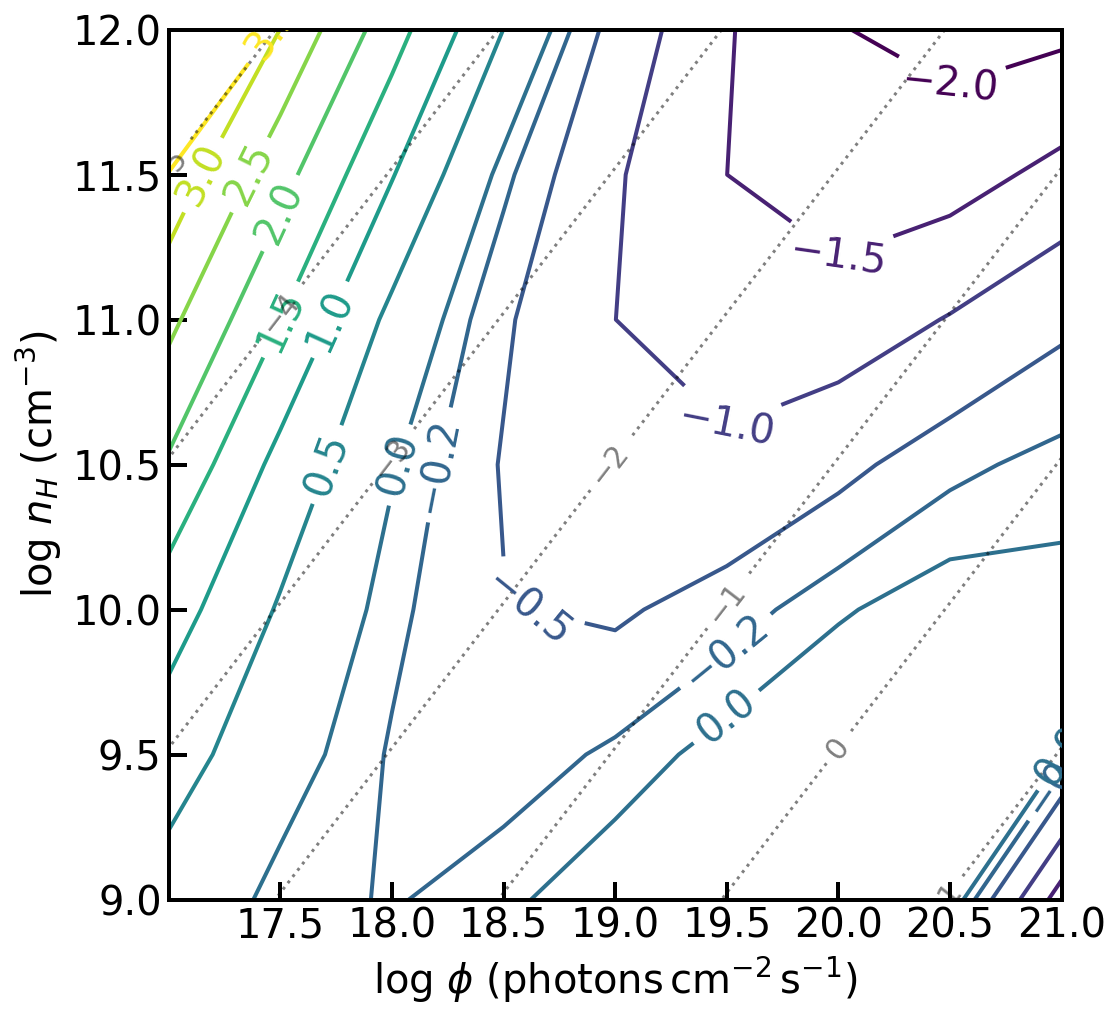

In [150]:
fig = plt.figure(figsize=(8,8)) 
contours = plt.contour(X, Y, np.log10(CIII / CIV), levels=level, linewidths=2)
us = plt.contour(X, Y, U, colors='k', alpha=0.5, linestyles=':')
plt.clabel(contours, inline=True, fontsize=20)
#plt.clabel(contours, inline=True, fontsize=20)
plt.clabel(us, inline=True, fontsize=15)
plt.xticks(np.arange(min(x)+0.5, max(x)+0.5, 0.5), fontsize=20)
plt.yticks(np.arange(min(y), max(y)+0.5, 0.5), fontsize=20)
#plt.title(r' log I(CIII 1909)/I(CIV 1549), N=24, $Z=4Z_{\odot}$', fontsize=15)
plt.ylabel(r'log $n_H$ $(\rm cm^{-3})$', fontsize=20)
plt.xlabel(r'log $\phi$ $(\rm photons\,cm^{-2}\,s^{-1})$', fontsize=20)
plt.tick_params(axis='both', which='major',length=9,width=2,direction='in')
plt.savefig('c3_over_c4_paperplot', dpi=300, facecolor='white', edgecolor='white');

In [ ]:
levels_c4= [0.01, 0.1, 0.5, 1, 4, 6, 8, 10, 12]

In [ ]:
fig = plt.figure(figsize=(8,8)) 
contours = plt.contour(X, Y,CIV, levels=levels_c4)
us = plt.contour(X, Y, U, colors='k', alpha=0.5, linestyles=':')
plt.clabel(contours, inline=True, fontsize=20)
plt.clabel(us, inline=True, fontsize=15)
plt.xticks(np.arange(min(x), max(x)+0.5, 0.5), fontsize=15)
plt.yticks(np.arange(min(y), max(y)+0.5, 0.5), fontsize=15)
plt.title(r' log I(CIV 1549)/I(H$\beta$), N=24, $v_{turb}=100$km/s, $Z=4Z_{\odot}$', fontsize=15)
plt.ylabel('log $n_H$', fontsize=15)
plt.xlabel('log $\phi$', fontsize=15);
plt.savefig('c4.png', dpi=300, facecolor='white', edgecolor='white');

In [ ]:
10**level1

In [ ]:
fig = plt.figure(figsize=(8,8)) 

contours0 = plt.contour(X, Y, CIII / CIV, levels=10**level1)
contours = plt.contour(X, Y, CIII_v500 / CIV_v500, levels=10**level1, linestyles='--')
us = plt.contour(X, Y, U, colors='k', alpha=0.5, linestyles=':')
plt.clabel(contours, inline=True, fontsize=20)
plt.clabel(us, inline=True, fontsize=15)
plt.xticks(np.arange(min(x), max(x)+0.5, 0.5), fontsize=15)
plt.yticks(np.arange(min(y), max(y)+0.5, 0.5), fontsize=15)
plt.title(r' log I(CIII 1909)/I(CIV 1549), N=24, $v_{turb}=100$km/s, $Z=4Z_{\odot}$', fontsize=15)
plt.ylabel('log $n_H$', fontsize=15)
plt.xlabel('log $\phi$', fontsize=15);
plt.savefig('c3_over_c4', dpi=300, facecolor='white', edgecolor='white');

In [ ]:
fig = plt.figure(figsize=(8,8)) 
levels_si4 = [-2,-1.5,-1,-0.8,-0.7,-0.6,-0.4,-0.2,0,1,2]
contours0 = plt.contour(X, Y, np.log10(SiIV1397 / CIV), levels=levels_si4)
#contours = plt.contour(X, Y, np.log10(CIII_v500 / CIV_v500), levels=level, linestyles='--',label=r'$v_{turb}=500$km/s')
us = plt.contour(X, Y, U, colors='k', alpha=0.5, linestyles=':')
plt.clabel(contours0, inline=True, fontsize=15)
#plt.clabel(contours, inline=True, fontsize=20)
plt.clabel(us, inline=True, fontsize=15)
plt.xticks(np.arange(min(x), max(x)+0.5, 0.5), fontsize=15)
plt.yticks(np.arange(min(y), max(y)+0.5, 0.5), fontsize=15)
#plt.title(r' log I(CIII 1909)/I(CIV 1549), N=24, $Z=4Z_{\odot}$', fontsize=15)
plt.ylabel(r'log $n_H$ $(\rm cm^{-3})$', fontsize=20)
plt.xlabel(r'log $\phi$ $(\rm photons\,cm^{-2}\,s^{-1})$', fontsize=20)
plt.savefig('si4_over_c4_paperplot', dpi=300, facecolor='white', edgecolor='white');


In [ ]:
fig = plt.figure(figsize=(8,8)) 
levels_si4_o4 = [-1,-0.63,-0.6,-0.5,-0.4,-0.2,0,0.2,1,2]
contours0 = plt.contour(X, Y, np.log10((SiIV1397+OIV1402) / CIV), levels=levels_si4_o4)
#contours = plt.contour(X, Y, np.log10(CIII_v500 / CIV_v500), levels=level, linestyles='--',label=r'$v_{turb}=500$km/s')
us = plt.contour(X, Y, U, colors='k', alpha=0.5, linestyles=':')
plt.clabel(contours0, inline=True, fontsize=20)
#plt.scatter(19.5,10,200,'r','*')
#plt.annotate('log SiIV+OIV/CIV=-0.6',(19,9.8),fontsize=15)
#plt.clabel(contours, inline=True, fontsize=20)
plt.clabel(us, inline=True, fontsize=15)
plt.xticks(np.arange(min(x), max(x)+0.5, 0.5), fontsize=15)
plt.yticks(np.arange(min(y), max(y)+0.5, 0.5), fontsize=15)
#plt.title(r' log I(CIII 1909)/I(CIV 1549), N=24, $Z=4Z_{\odot}$', fontsize=15)
plt.ylabel(r'log $n_H$ $(\rm cm^{-3})$', fontsize=20)
plt.xlabel(r'log $\phi$ $(\rm photons\,cm^{-2}\,s^{-1})$', fontsize=20)
plt.savefig('Nagao_ratio_paperplot', dpi=300, facecolor='white', edgecolor='white');


In [ ]:
fig = plt.figure(figsize=(8,8)) 
contours = plt.contour(X, Y, HeI5875, linewidths=3)
us = plt.contour(X, Y, U, colors='k', alpha=0.5, linestyles=':')
plt.clabel(contours, inline=True, fontsize=20)
#plt.clabel(contours, inline=True, fontsize=20)
plt.clabel(us, inline=True, fontsize=15)
plt.xticks(np.arange(min(x)+0.5, max(x)+0.5, 0.5), fontsize=20)
plt.yticks(np.arange(min(y), max(y)+0.5, 0.5), fontsize=20)
#plt.title(r' log I(CIII 1909)/I(CIV 1549), N=24, $Z=4Z_{\odot}$', fontsize=15)
plt.ylabel(r'log $n_H$ $(\rm cm^{-3})$', fontsize=20)
plt.xlabel(r'log $\phi$ $(\rm photons\,cm^{-2}\,s^{-1})$', fontsize=20)
plt.tick_params(axis='both', which='major',length=9,width=2,direction='in')
plt.savefig('HeI_over_Hb_paperplot', dpi=300, facecolor='white', edgecolor='white');

In [ ]:
fig = plt.figure(figsize=(8,8)) 
contours = plt.contour(X, Y, HeI7065/HeI5875)
us = plt.contour(X, Y, U, colors='k', alpha=0.5, linestyles=':')
plt.clabel(contours, inline=True, fontsize=15)
#plt.clabel(contours, inline=True, fontsize=20)
plt.clabel(us, inline=True, fontsize=15)
plt.xticks(np.arange(min(x), max(x)+0.5, 0.5), fontsize=15)
plt.yticks(np.arange(min(y), max(y)+0.5, 0.5), fontsize=15)
#plt.title(r' log I(CIII 1909)/I(CIV 1549), N=24, $Z=4Z_{\odot}$', fontsize=15)
plt.ylabel(r'log $n_H$ $(\rm cm^{-3})$', fontsize=15)
plt.xlabel(r'log $\phi$ $(\rm photons\,cm^{-2}\,s^{-1})$', fontsize=15)
plt.savefig('7075_over_5876_paperplot', dpi=300, facecolor='white', edgecolor='white');

In [ ]:
CIII / CIV

In [ ]:
plt.imshow(np.log10(CIII / CIV))

In [ ]:
from numpy import nan
import numpy.ma as ma

In [ ]:
Shang_5876 = np.array([19.7,18.8,8.4,36.7,17.2,47.7,18.1,10.5,163.5,23.2,13.4,\
                      18.1,31.7,32.7,15.8,5.8,9.9,37.7,17.9,nan,8.1,31.5])
Shang_5876_ew = np.array([23.8,13.9,17.0,22.5,17.5,23.6,28.6,10.5,12.5,13.2,15.1,\
                      24.0,23.8,9.5,11.4,11.6,19.4,9.4,21.7,nan,18.0,26.1])
Shang_5876_dv = np.array([-10,280,300,355,505,180,35,145,900,445,200,\
                      10,520,10,45,-1090,425,215,660,nan,480,430])

Shang_ha = np.array([338,477,199,720,317,1153,334,344,4745,415,283,289,520,1371,\
                    327,223,183,980,314,163,162,548])
Shang_ha_ew = np.array([422,422,457,485,355,646,559,375,393,263,362,434,444,441,\
                    254,496,405,270,447,503,352,528])


Shang_hb = np.array([122,181,59,192,85,318,109,108,1336,153,89,85,149,495,98,\
                    71,74,299,78,72,45,170])


Shang_5876_fwhm = np.array([4655,3190,3010,5310,2300,3535,3795,3965,4700,3950,\
                           2960,4505,2350,2190,2575,5800,2540,2020,2710,nan,2425,4890])
Shang_Lbol = np.array([45.66,46.05,45.22,45.63,45.43,45.92,45.32,46.26,46.62,45.89,45.52,\
                      45.35,45.68,45.52,45.30,46.04,45.55,45.43,45.96,45.92,46.13,45.45])
Shang_led = np.array([0.16,0.41,0.42,0.14,0.81,0.44,0.10,0.14,0.53,0.29,0.30,0.15,0.88,0.38,\
                     0.38,0.04,0.52,0.95,0.53,0.07,2.06,0.15])

In [ ]:
Shang_C3_over_C4 = np.array([0.190,
0.160,
0.290,
0.305,
0.222,
0.247,
0.176,
0.126,
0.235,
0.244,
0.179,
0.183,
0.212,
0.465,
0.250,
0.165,
0.156,
0.447,
0.412,
0.131,
nan,
0.246])

Shang_SiIV_over_CIV = np.array([0.112,
0.098,
0.191,
0.110,
0.175,
0.121,
0.069,
0.061,
0.274,
0.084,
0.092,
0.134,
0.181,
0.234,
0.195,
0.047,
0.117,
0.203,
0.332,
0.033,
0.191,
0.139])

In [ ]:
Shang_5876/Shang_hb

In [ ]:
fig = plt.figure(figsize=(8,6)) 
plt.scatter(Shang_C3_over_C4, Shang_5876/Shang_hb)
plt.xlabel(r'I(CIII]) / I(CIV)', fontsize=15)
plt.ylabel(r'I(HeI5876) / I(H$\beta$)', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid()
plt.savefig('Shang07_c3_c4.png', dpi=300, facecolor='white', edgecolor='white');

In [ ]:
fig = plt.figure(figsize=(8,6)) 
plt.scatter(Shang_SiIV_over_CIV, Shang_5876/Shang_hb)
plt.xlabel(r'I(SiIV + OIV) / I(CIV)', fontsize=15)
plt.ylabel(r'I(HeI5876) / I(H$\beta$)', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid()
plt.savefig('Shang07_si.png', dpi=300, facecolor='white', edgecolor='white');

In [ ]:
len(Shang_ha)

In [ ]:
fig = plt.figure(figsize=(8,6)) 
plt.hist(Shang_5876/Shang_hb);

In [ ]:
fig = plt.figure(figsize=(8,6)) 
plt.scatter(Shang_Lbol, Shang_5876/Shang_hb)
plt.xlabel(r'$log L_{bol}$ (erg $s^{-1}$)', fontsize=15)
plt.ylabel(r'I(HeI5876) / I(H$\beta$)', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid();

fig = plt.figure(figsize=(8,6)) 
plt.scatter(np.log10(Shang_led), Shang_5876/Shang_hb)
plt.xlabel(r'$log L_{bol}/L_{Edd}$ (erg $s^{-1}$)', fontsize=15)
plt.ylabel(r'I(HeI5876) / I(H$\beta$)', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid();

In [ ]:
fig = plt.figure(figsize=(8,6)) 
plt.scatter(Shang_ha/Shang_hb, Shang_5876/Shang_hb)
plt.xlabel(r'I(H$\alpha$) / I(H$\beta$)', fontsize=15)
plt.ylabel(r'I(HeI5876) / I(H$\beta$)', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid()
plt.savefig('Shang07_he5876_halpha.png', dpi=300, facecolor='white', edgecolor='white');

fig = plt.figure(figsize=(8,6)) 
plt.scatter(Shang_ha_ew, Shang_5876_ew)
plt.xlabel(r'EW(H$\alpha$) ($\rm \AA$)', fontsize=15)
plt.ylabel(r'EW(HeI5876) ($\rm \AA$)', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid()
plt.savefig('Shang07_he5876_halpha_EW.png', dpi=300, facecolor='white', edgecolor='white');

In [ ]:
fig = plt.figure(figsize=(8,6)) 
plt.scatter(Shang_5876_dv,Shang_5876/Shang_hb)
plt.xlabel(r'$\Delta$v ($\rm km s^{-1}$)', fontsize=15)
plt.ylabel(r'I(HeI5876) / I(H$\beta$)', fontsize=15)
plt.xlim(-100,700)
#plt.ylim(0,50)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid()
plt.savefig('Shang07_he5876_dv.png', dpi=300, facecolor='white', edgecolor='white');

In [ ]:
fig = plt.figure(figsize=(8,6)) 
plt.scatter(Shang_ha/Shang_hb, Shang_C3_over_C4)
plt.xlabel(r'I(H$\alpha$) / I(H$\beta$)', fontsize=15)
plt.ylabel(r'I(CIII]) / I(CIV)', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid()
plt.savefig('Shang07_c4_halpha.png', dpi=300, facecolor='white', edgecolor='white');

In [ ]:
print(ma.corrcoef(ma.masked_invalid(Shang_Lbol), ma.masked_invalid(Shang_5876/Shang_hb)))

In [ ]:
print(ma.corrcoef(ma.masked_invalid(Shang_led), ma.masked_invalid(Shang_5876/Shang_hb)))

In [ ]:
print(ma.corrcoef(ma.masked_invalid(Shang_5876/Shang_hb), ma.masked_invalid(Shang_ha/Shang_hb)))

In [ ]:
3c_120 = np.array([19.7,18.8,8.4,36.7,17.2,47.7,18.1,10.5,163.5,23.2,13.4,\
                      18.1,31.7,32.7,15.8,5.8,9.9,37.7,17.9,nan,8.1,31.5])